In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [5]:
dir = "./server_isi/output1"

In [6]:
results = pd.read_csv(dir + "/grid_search.csv")
results

,batch_size,lags,epoch,val_loss,train_loss
0,128,22,119,0.012395,0.000636
1,128,48,119,0.011494,0.000568
2,128,117,199,0.010976,0.001586
3,128,27,115,0.012251,0.000711
4,128,43,128,0.014959,0.000610
...,...,...,...,...,...
145,128,1,236,0.005796,0.003673
146,128,1,187,0.005189,0.003855
147,128,29,118,0.015245,0.000635
148,128,1,250,0.004713,0.003507


In [7]:
trials = pickle.load(open(dir + "/hyp_trials.p", "rb"))

In [8]:
trials

In [9]:
# Results of various trials hyperopt optimization.
loss_history = [t["result"]["loss"] for t in trials.trials]
lags_history = [t["misc"]["vals"]["lags"][0] for t in trials.trials]
batch_size_history = [t["misc"]["vals"]["batch_size"][0] for t in trials.trials]

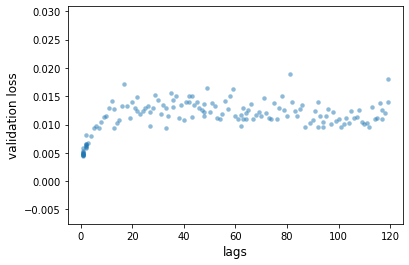

In [10]:
fig, ax = plt.subplots()
ax.scatter(lags_history, loss_history, s = 20, linewidth = 0.01, alpha = 0.5)
ax.set_xlabel("lags", fontsize = 12)
ax.set_ylabel("validation loss", fontsize = 12);

Text(0, 0.5, 'validation loss')

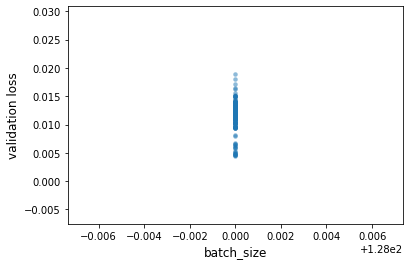

In [11]:
fig, ax = plt.subplots()
ax.scatter(batch_size_history, loss_history, s = 20, linewidth = 0.01, alpha = 0.5)
ax.set_xlabel("batch_size", fontsize = 12)
ax.set_ylabel("validation loss", fontsize = 12)

In [13]:
results["train_val_difference"] = results.apply(lambda x: np.abs(x.train_loss - x.val_loss), axis = 1)

In [16]:
results.iloc[results.val_loss.idxmin()]

batch_size              128.000000
lags                      1.000000
epoch                   250.000000
val_loss                  0.004487
train_loss                0.003641
train_val_difference      0.000846
Name: 82, dtype: float64

In [17]:
results.iloc[results.train_val_difference.idxmin()]

batch_size              128.000000
lags                      1.000000
epoch                   250.000000
val_loss                  0.004487
train_loss                0.003641
train_val_difference      0.000846
Name: 82, dtype: float64